In [ ]:
# Geospatial Data Analysis
# Data analysis on Raster data

In [30]:
import rasterio
from rasterio.plot import show, show_hist

In [2]:
#rasterio.open() will just give info about the image
lulc=rasterio.open(r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\geotiff\nepal_lc_2020.tif')

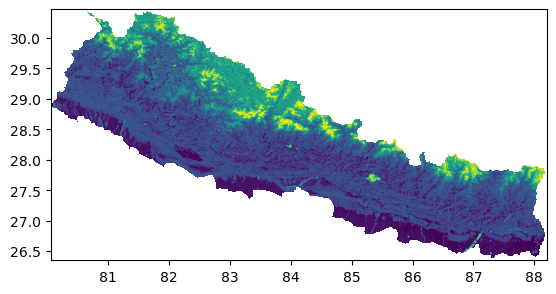

<Axes: >

In [5]:
show(lulc)

In [6]:
lulc
#o/p is in read mode. Therefore values cannot be changed

<open DatasetReader name='F:/python/RS_GIS_Python/geospatial-data-analysis-python-master/data/geotiff/nepal_lc_2020.tif' mode='r'>

In [8]:
#To see the values of lulc
data=lulc.read()
data

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [10]:
#Reading metadata from the raster
lulc.meta
#In output count indicates the band1
#its a 300m datsset
#metadat does not cover all data like name, descriptions

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 2932,
 'height': 1485,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0027777777777780012, 0.0, 80.05847091000004,
        0.0, -0.0027777777777780012, 30.472819010000357)}

In [11]:
#To know the name of the file
lulc.name

'F:/python/RS_GIS_Python/geospatial-data-analysis-python-master/data/geotiff/nepal_lc_2020.tif'

In [12]:
#To know the number of bands from metadata
lulc.count

1

In [13]:
lulc.shape

(1485, 2932)

In [14]:
#To get any metadat individually, we can get using their sttributes
lulc.height

1485

In [15]:
lulc.driver

'GTiff'

In [16]:
lulc.crs

CRS.from_epsg(4326)

In [18]:
lulc.descriptions

(None,)

In [20]:
data=lulc.read()

In [21]:
data.size

4354020

In [22]:
data.dtype

dtype('uint8')

In [23]:
#To get min and max values
data.min()

10

In [24]:
data.max()

255

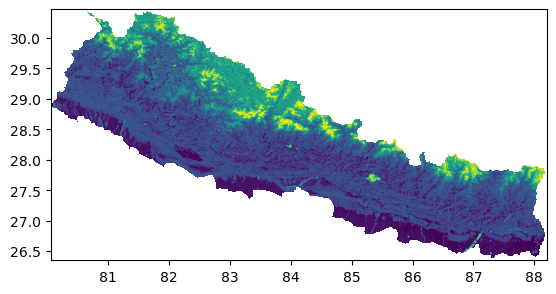

<Axes: >

In [25]:
show(lulc)

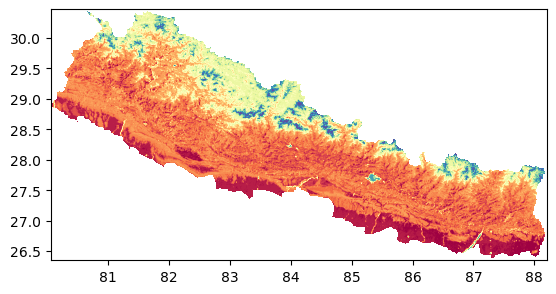

<Axes: >

In [27]:
#Different cmap can be obtained from matplotlib.org
show(lulc,cmap='Spectral')

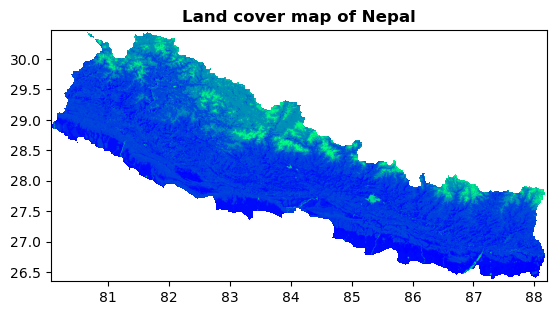

<Axes: title={'center': 'Land cover map of Nepal'}>

In [29]:
##Adding title
show(lulc,cmap='winter',title='Land cover map of Nepal')

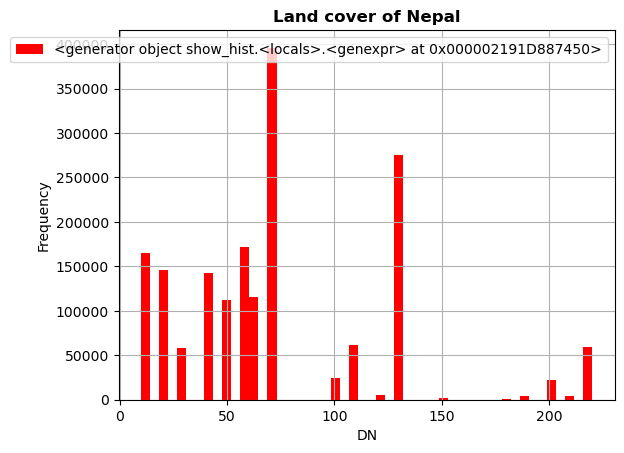

In [31]:
#To know the least and most land cover usage
show_hist(lulc, bins=50,title='Land cover of Nepal')
# Based on DN values, we can tell the categoer
#like DN=75, there are treecover, needleleaved,evergreeforests
#Check in this manual the classes:Copernicus climate change -Product User Guide and Specification --ICDR Land Cover 2016 and 2017

In [36]:
with rasterio.open(r'F:\python\RS_GIS_Python\Output\output_nepal_lulc_2020.tif','w',
                   driver=lulc.driver,
                   height=lulc.height,
                   width=lulc.width,
                   count=lulc.count,
                   crs=lulc.crs,
                   transform=lulc.transform,
                   dtype=data.dtype,) as dst:
 dst.write(data) 
#output is a tif file

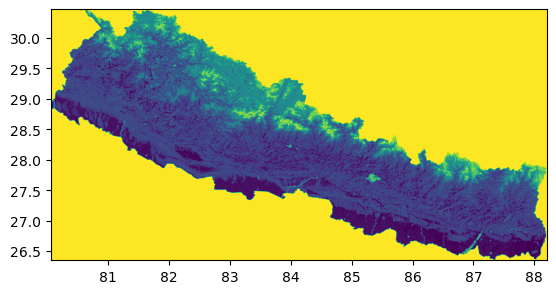

<Axes: >

In [37]:
dst_out=rasterio.open(r'F:\python\RS_GIS_Python\Output\output_nepal_lulc_2020.tif')
show(dst_out)

In [3]:
###Raster reclassification
import numpy as np
import rasterio
from rasterio.plot import show, show_hist

In [4]:
ds=rasterio.open('F:\python\RS_GIS_Python\Output\output_nepal_lulc_2020.tif')
ds

<open DatasetReader name='F:/python/RS_GIS_Python/Output/output_nepal_lulc_2020.tif' mode='r'>

In [6]:
data=ds.read()
data

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [7]:
#Copy the data into a variable caleed dup
dup=data.copy()
#Based on some range the craster pixels will be classified
#use copernicus_PUBG pdf for reclassification
##if DN values are between 10-40 then it is Agriculture---class1
##if DN values between 50 -100 then it is Treecover (Forest) ---class2
### if DN values between 110-180 then it is Grassland---class3
### if DN values greater than equal to 190 then it is Urban---class4
### if DN values greater than equal to 200 then it is Bare areas---class5
### if DN values  between 210-220 then water and snow --class6
np.where((dup>10)&(dup<40)) 

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([  35,   35,   36, ..., 1483, 1484, 1484], dtype=int64),
 array([ 231,  234,  232, ..., 2623, 2621, 2622], dtype=int64))

In [13]:
dup[np.where((dup>=10)&(dup<=40))]=1 #Agriculture
dup[np.where((dup>=50)&(dup<=100))]=2 #Forest
dup[np.where((dup>=110)&(dup<=180))]=3 # Grassland
dup[np.where(dup>=190)]=4 #Urban
dup[np.where(dup>=200)]=5 #Bareland
dup[np.where((dup>=210)&(dup<=200))]=6 # water and snow

#To save the output which is the reclassified image,create a output folder
with rasterio.open(r'F:\python\RS_GIS_Python\Output\output_reclassified_nepal_lulc.tif','w',
                  driver=ds.driver,
                   width=ds.width,
                   height=ds.height,
                   count=ds.count,
                   crs=ds.crs,
                   transform=ds.transform,
                   dtype=data.dtype
                  ) as dst_class:
    dst_class.write(dup)


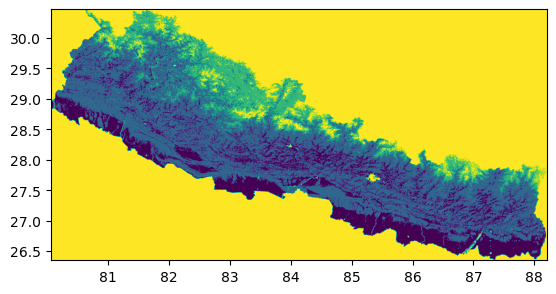

<Axes: >

In [14]:
out=rasterio.open(r'F:\python\RS_GIS_Python\Output\output_reclassified_nepal_lulc.tif')
show(out)
#We cannot see those 6 classes cllearly here, will open Arcgis or QGIS is used to visualise it

In [ ]:
### Raster Mask or clipping

In [1]:
import fiona

In [5]:
with fiona.open('F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\shp\pokhara.shp','r') as shapefile:
    #print(shapefile)
    for feature in shapefile:
        print(feature['geometry'])

In [6]:
with fiona.open('F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\shp\pokhara.shp','r') as shapefile:
    #print(shapefile)
    for feature in shapefile:
        shapes=[feature['geometry']]

In [7]:
shapes  #output should be geometry type and lat,long

In [19]:
import rasterio.mask
from rasterio.plot import show, show_hist

In [17]:
with rasterio.open('F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\geotiff\\nepal_lc_2020.tif') as src:
    out_image,out_transform=rasterio.mask.mask(src,shapes, crop=True)
    out_meta=src.meta
out_meta.update({
     "driver":'Gtiff',
     "height":out_image.shape[1],
     "width":out_image.shape[2],
     "transform":out_transform
 })  

#Write the clip raster to save
with rasterio.open('F:\python\RS_GIS_Python\Output\output_pokhara_lc_2020.tif','w',**out_meta) as dst:
            dst.write(out_image)

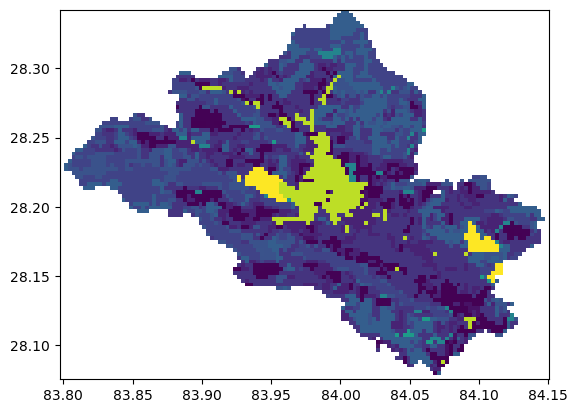

<Axes: >

In [20]:
show(rasterio.open(r'F:\python\RS_GIS_Python\Output\output_pokhara_lc_2020.tif'))

In [ ]:
##Zonal statistics of raster

In [6]:
import rasterio
import geopandas as gpd
import rasterstats
from rasterstats import zonal_stats

In [ ]:
#Here we will consider the zonal stats of nepal_lulc_2020 raster image using pokhara and municipalities shape files

In [4]:
raster=rasterio.open(r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\geotiff\nepal_lc_2020.tif')

In [8]:
pokhara_shp=gpd.read_file(r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\shp\pokhara.shp')

In [12]:
#To get the zonal stats of pokhara district of nepal
#zonal_stats(path of pokhara_shp,path of raster)
zonal_stats(r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\shp\pokhara.shp', r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\geotiff\nepal_lc_2020.tif')

[{'min': 10.0, 'max': 210.0, 'mean': 55.69660281893748, 'count': 5534}]

In [13]:
#zonal stats of all municipalities in nepal
zonal_stats(r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\shp\municipality.shp', r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\geotiff\nepal_lc_2020.tif')

[{'min': 10.0, 'max': 121.0, 'mean': 47.148042024832854, 'count': 1047},
 {'min': 10.0, 'max': 130.0, 'mean': 60.31011097410604, 'count': 1622},
 {'min': 10.0, 'max': 130.0, 'mean': 63.60129136400323, 'count': 2478},
 {'min': 10.0, 'max': 220.0, 'mean': 89.81027894535728, 'count': 5234},
 {'min': 10.0, 'max': 220.0, 'mean': 131.13959737657132, 'count': 21956},
 {'min': 10.0, 'max': 120.0, 'mean': 61.545638945233264, 'count': 1479},
 {'min': 10.0, 'max': 130.0, 'mean': 67.40462427745665, 'count': 2422},
 {'min': 10.0, 'max': 220.0, 'mean': 92.84327176781002, 'count': 5685},
 {'min': 10.0, 'max': 100.0, 'mean': 53.39944903581267, 'count': 1089},
 {'min': 10.0, 'max': 120.0, 'mean': 61.100370218017275, 'count': 2431},
 {'min': 10.0, 'max': 130.0, 'mean': 56.57710651828299, 'count': 1258},
 {'min': 10.0, 'max': 210.0, 'mean': 48.99038461538461, 'count': 1456},
 {'min': 10.0, 'max': 130.0, 'mean': 60.89349112426036, 'count': 1521},
 {'min': 10.0, 'max': 121.0, 'mean': 58.75574859478794, 'co

In [14]:
#Similarly we can estimate the percentiles of each municipality, lets do for pokhara
zonal_stats(r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\shp\pokhara.shp', r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\geotiff\nepal_lc_2020.tif', stats=['sum', 'std', 'unique', 'nodata'])

[{'sum': 308225.0, 'std': 43.52634550690308, 'unique': 14, 'nodata': 0.0}]

In [18]:
#To calculate the area of a particular land class.
#In pokhara the unique value shows there are 14 land cover classes, lets calculate the area of each land class
#categorical=True will tells the pixel count of each class
zonal_stats(r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\shp\pokhara.shp', r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\geotiff\nepal_lc_2020.tif', categorical=True)

[{10: 275,
  11: 347,
  20: 27,
  30: 638,
  40: 1547,
  50: 908,
  60: 431,
  61: 38,
  70: 833,
  100: 64,
  110: 2,
  120: 15,
  190: 305,
  210: 104}]

In [19]:
#Similarly we can do it for all municipalities and can save it in pandas dataframe
lulc_classes=zonal_stats(r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\shp\municipality.shp', r'F:\python\RS_GIS_Python\geospatial-data-analysis-python-master\data\geotiff\nepal_lc_2020.tif', categorical=True)
import pandas as pd
df=pd.DataFrame(lulc_classes)
df.head()

,10,11,20,30,40,50,60,61,70,100,...,150,200,201,202,210,12,190,122,180,90
0,63.0,42.0,3.0,149.0,133.0,322.0,157.0,20.0,140.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,22.0,1.0,38.0,110.0,447.0,185.0,41.0,696.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30.0,34.0,1.0,154.0,216.0,425.0,125.0,117.0,1139.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29.0,11.0,NaN,50.0,117.0,278.0,77.0,74.0,2503.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58.0,70.0,21.0,167.0,287.0,812.0,177.0,174.0,4999.0,170.0,...,6.0,820.0,27.0,10.0,5.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#To calculate the we need the spatial resolution, for this raster it is 30mx30m
#So multiply the count values with 30 to get the area of each class...units is sq.m
